<a href="https://colab.research.google.com/github/mrFahrenhiet/Movie_Recommendation_System/blob/master/Recomendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Item Similarity Based Recomendation System

### Download Dataset

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-07-14 16:55:53--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  27.1MB/s    in 0.2s    

2020-07-14 16:55:53 (27.1 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [3]:
!unzip /content/ml-100k.zip

Archive:  /content/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


### Dataset Preps

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dfr = pd.read_csv("/content/ml-100k/u.data",sep='\t',names=['userId','movieId','rating','timestamp'])
dfr

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
dfm = pd.read_csv('/content/ml-100k/u.item',sep='\|',header=None)
dfm = dfm[[0,1]]
dfm

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [7]:
dfr['userId'].nunique()

943

In [8]:
dfr['movieId'].nunique()

1682

In [9]:
dfm.columns = ['movieId','title']
dfm

,movieId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [10]:
dfm.merge(dfr,right_on='movieId',left_on='movieId')

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1,889289570
99996,1679,B. Monkey (1998),863,3,889289491
99997,1680,Sliding Doors (1998),863,2,889289570
99998,1681,You So Crazy (1994),896,3,887160722


### Expolatory Data Analysis

In [11]:
import seaborn as sns
sns.set_style('dark')

In [12]:
df = dfm.merge(dfr,right_on='movieId',left_on='movieId')

In [13]:
df

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1,889289570
99996,1679,B. Monkey (1998),863,3,889289491
99997,1680,Sliding Doors (1998),863,2,889289570
99998,1681,You So Crazy (1994),896,3,887160722


In [14]:
df.groupby('title').mean()[['rating']]

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [15]:
df.groupby('title').mean()[['rating']].sort_values(by='rating',ascending=False)

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [16]:
df.movieId[0]

1

In [17]:
c= {}
for i in df['movieId']:
  if i not in c:
    c[i] = 1
  else:
    c[i]+=1

print(c)

{1: 452, 2: 131, 3: 90, 4: 209, 5: 86, 6: 26, 7: 392, 8: 219, 9: 299, 10: 89, 11: 236, 12: 267, 13: 184, 14: 183, 15: 293, 16: 39, 17: 92, 18: 10, 19: 69, 20: 72, 21: 84, 22: 297, 23: 182, 24: 174, 25: 293, 26: 73, 27: 57, 28: 276, 29: 114, 30: 37, 31: 154, 32: 81, 33: 97, 34: 7, 35: 11, 36: 13, 37: 8, 38: 120, 39: 87, 40: 57, 41: 37, 42: 148, 43: 40, 44: 79, 45: 80, 46: 27, 47: 133, 48: 117, 49: 81, 50: 583, 51: 81, 52: 91, 53: 128, 54: 104, 55: 149, 56: 394, 57: 40, 58: 175, 59: 83, 60: 64, 61: 59, 62: 127, 63: 82, 64: 283, 65: 115, 66: 162, 67: 103, 68: 134, 69: 321, 70: 251, 71: 220, 72: 129, 73: 128, 74: 7, 75: 5, 76: 54, 77: 151, 78: 33, 79: 336, 80: 68, 81: 110, 82: 261, 83: 176, 84: 18, 85: 58, 86: 150, 87: 138, 88: 213, 89: 275, 90: 95, 91: 143, 92: 104, 93: 112, 94: 137, 95: 219, 96: 295, 97: 256, 98: 390, 99: 172, 100: 508, 101: 73, 102: 54, 103: 15, 104: 5, 105: 74, 106: 71, 107: 42, 108: 65, 109: 130, 110: 31, 111: 272, 112: 20, 113: 9, 114: 67, 115: 15, 116: 125, 117: 378

In [18]:
df.groupby('title').count()[['rating']].sort_values(by='rating',ascending=False)

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [19]:
df_ratings =  pd.DataFrame(df.groupby('title').mean()['rating'])
df_ratings['num ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [20]:
df_ratings.sort_values(by='num ratings',ascending=False)

,rating,num ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


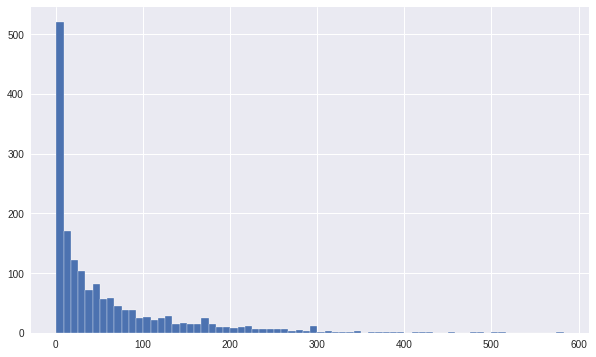

In [21]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
plt.hist(df_ratings['num ratings'],bins=70)
plt.show()

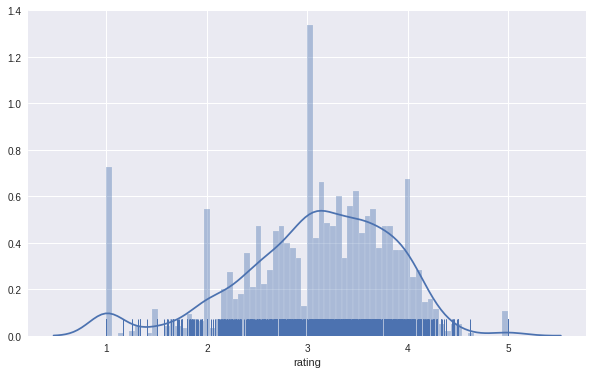

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(df_ratings['rating'],norm_hist=False,rug=True,bins=70)
plt.show()

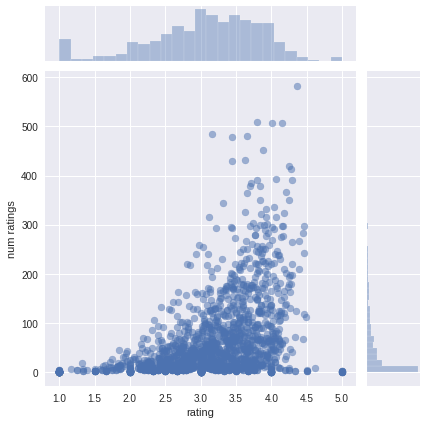

In [23]:
sns.jointplot(x='rating',y='num ratings',data=df_ratings,alpha=0.5)

In [24]:
moviemat = df.pivot_table(values='rating',index='userId',columns='title')

In [25]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [26]:
mostWatched = moviemat['Star Wars (1977)']

In [27]:
mostWatched

userId
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [29]:
similar_watches = moviemat.corrwith(mostWatched)

In [30]:
similar_watches.isna().sum()

254

In [33]:
similar_watches = pd.DataFrame(similar_watches)

In [36]:
similar_watches.dropna(axis=0,inplace=True)

In [37]:
similar_watches

,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [47]:
similar_watches.columns = ['correlation']

In [48]:
similar_watches.sort_values(by='correlation',ascending=False)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [55]:
corr_stw = similar_watches.join(df_ratings)

In [56]:
corr_stw

,correlation,rating,num ratings
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41
...,...,...,...
Young Guns (1988),0.186377,3.207921,101
Young Guns II (1990),0.228615,2.772727,44
"Young Poisoner's Handbook, The (1995)",-0.007374,3.341463,41


In [57]:
corr_stw.sort_values(by='correlation',ascending=False)

,correlation,rating,num ratings
title,,,
Commandments (1997),1.0,2.666667,3
Cosi (1996),1.0,4.000000,4
No Escape (1994),1.0,2.400000,5
Stripes (1981),1.0,3.800000,5
Man of the Year (1995),1.0,3.111111,9
...,...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,2.800000,5
For Ever Mozart (1996),-1.0,2.000000,3
American Dream (1990),-1.0,2.500000,2


In [65]:
recom = corr_stw[corr_stw['num ratings']>10]
recom = recom[corr_stw['rating']>2.0]
recom = recom[recom['correlation']>0]

In [68]:
recom.sort_values(by='correlation',ascending=False).iloc[1:]

,correlation,rating,num ratings
title,,,
That Old Feeling (1997),7.500000e-01,3.363636,11
"Empire Strikes Back, The (1980)",7.479814e-01,4.204360,367
American Buffalo (1996),7.225916e-01,2.636364,11
Return of the Jedi (1983),6.725559e-01,4.007890,507
Meet John Doe (1941),6.333119e-01,3.920000,25
...,...,...,...
Lost Highway (1997),2.183257e-03,3.136000,125
Conan the Barbarian (1981),1.548863e-03,3.046729,107
Cape Fear (1991),1.371029e-03,3.456140,171


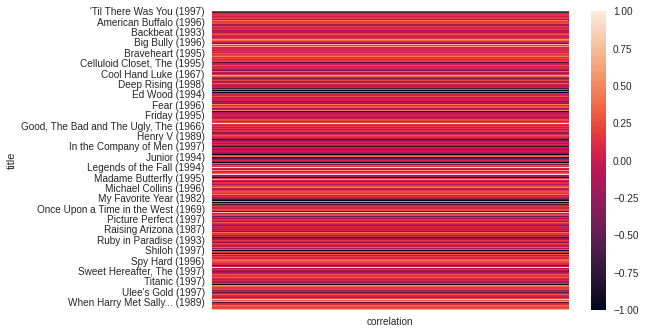

In [71]:
sns.heatmap(similar_watches)

In [73]:
recommend_movie

### Model

In [91]:
def recommend_movie(movie,moviemat,df_ratings):
  mostWatched = moviemat[movie]
  similar_watches = moviemat.corrwith(mostWatched)
  similar_watches = pd.DataFrame(similar_watches)
  similar_watches.columns = ['correlation']
  similar_watches.dropna(axis=0,inplace=True)
  corr_stw = similar_watches.join(df_ratings)
  recom = corr_stw[corr_stw['num ratings']>10]
  recom = recom[corr_stw['rating']>2.0]
  recom = recom[recom['correlation']>0.1]
  return recom.sort_values(by='correlation',ascending=False).iloc[1:]

In [92]:
recommend_movie('Empire Strikes Back, The (1980)',moviemat,df_ratings).to_csv('recom.csv')

In [93]:
preds = pd.read_csv('recom.csv')

In [94]:
preds = preds[['title']].values

In [95]:
preds.shape

(501, 1)

In [96]:
preds = preds.reshape((-1,))

In [105]:
print("We Recommend Watching")
for nos,i in enumerate(preds[:10]):
  print("{0}.".format(nos+1),i)

We Recommend Watching
1. Traveller (1997)
2. Meet John Doe (1941)
3. American Buffalo (1996)
4. Primary Colors (1998)
5. Star Wars (1977)
6. Return of the Jedi (1983)
7. To Be or Not to Be (1942)
8. When We Were Kings (1996)
9. Robert A. Heinlein's The Puppet Masters (1994)
10. Foreign Correspondent (1940)
